# Lab 2: 机器学习入门：贷款申请预测

在这个项目中，我们将学习如何使用机器学习来预测银行是否会批准贷款申请。

我们将学习以下内容：
1. 数据探索和可视化（EDA）
2. ML pipeline
3. 如何评估模型性能

# 1. 理论复习

你准备考TOFEL，下面是你可以选择的一些备考方案（Policy）
1. 去庙里求个签
2. 买本书回家自己刷
3. 报个新东方培训班
4. 请个私教

### 问题

1. 在这个背景里，你的优化目标是什么？
2. 你的训练损失是什么？你的泛化损失是什么？
3. 在这个背景下，你的feature set是什么？
4. 你通过背答案，在模拟考上得了很高分，但是在真实考试中却一塌胡涂。这种现象在机器学习里叫什么？
5. 为什么有人会花钱去国外参加考机考？而不是在国内做笔试？
6. 【挑战题】什么是VC维？(VC维刻画的是什么？)。为什么从1到4的VC维不断升高？

**Trick**设置中文字体

In [1]:
import matplotlib.pyplot as plt
# 设置中文字体
try:
    plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 或者 'Arial Unicode MS', 'PingFang SC' 等
    plt.rcParams['axes.unicode_minus'] = False
except Exception as e:
    print(f"设置中文字体失败: {e}。标签可能显示不正确。")

# 2. 探索性数据分析（**E**xploratory **D**ata **A**nalysis）

## 2.1 Context 

### 2.1.1 元数据(Metadata)
| Column | Description | Type |
|--------|-------------|------|
| person_age | Age of the person | Float |
| person_gender | Gender of the person | Categorical |
| person_education | Highest education level | Categorical |
| person_income | Annual income | Float |
| person_emp_exp | Years of employment experience | Integer |
| person_home_ownership | Home ownership status (e.g., rent, own, mortgage) | Categorical |
| loan_amnt | Loan amount requested | Float |
| loan_intent | Purpose of the loan | Categorical |
| loan_int_rate | Loan interest rate | Float |
| cb_person_cred_hist_length | Length of credit history in years | Float |
| credit_score | Credit score of the person | Integer |
| previous_loan_defaults_on_file | Indicator of previous loan defaults | Categorical |
| loan_status (target variable) | Loan approval status: 1 = approved; 0 = rejected | Integer |

### 2.1.2 提供技术环境信息

- 请使用pandas， matplotlib， sklearn这三个python package（也可以在mdc文件中设置）

- 项目目录结构
```
|
|- data // 数据目录
|   |-- loan_data.csv
|- lab.ipynb
```

In [2]:
# 一般import package都独立置顶

## 2.3 数据探索分析（EDA）

请用这个提示词去生成EDA代码。 模式选择 **“Ask”**，模型调整为Gemini-2.5-pro，打开max模式，充分释放模型能力
```
请读取loan data数据，生成EDA方案帮我熟悉这个数据集，为预测做准备。请先不要生成代码
```
在chat中和gemini达成一致后，让它生成多个code block，以便于你在notebook中执行和判断

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
# 注意：请确保你的环境中有所需的字体，例如 'Heiti TC', 'Arial Unicode MS', 'PingFang SC', 'SimHei' 等
# 如果以下某种字体不存在，请尝试替换为你的系统中可用的中文字体
try:
    plt.rcParams['font.sans-serif'] = ['Heiti TC'] # 优先使用 'Heiti TC'
    # 或者尝试其他常用中文字体
    # plt.rcParams['font.sans-serif'] = ['SimHei'] # 黑体
    # plt.rcParams['font.sans-serif'] = ['PingFang SC'] # 苹方
    # plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
    plt.rcParams['axes.unicode_minus'] = False  # 正确显示负号
except Exception as e:
    print(f"设置中文字体失败: {e}。标签可能显示不正确。")
    print("请尝试安装并使用系统中可用的中文字体，例如 'SimHei', 'PingFang SC', 'Microsoft YaHei' 等。")

# 加载数据
try:
    df = pd.read_csv('data/loan_data.csv')
except FileNotFoundError:
    print("错误：'data/loan_data.csv' 文件未找到。请确保文件路径正确。")
    # 在后续代码块执行前，你需要确保数据已正确加载，否则会报错。
    # 你可能需要调整路径，例如 '../data/loan_data.csv' 或提供绝对路径。
    df = pd.DataFrame() # 创建一个空的DataFrame以避免后续代码块立即报错，但请务必解决文件路径问题

# 显示数据前5行
print("数据前5行:")
if not df.empty:
    print(df.head())
else:
    print("数据未能加载，无法显示。")


数据前5行:
   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master          71948               0   
1          21        female      High School          12282               0   
2          25        female      High School          12438               3   
3          23        female         Bachelor          79753               0   
4          24          male           Master          66135               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000   EDUCATION          11.14   
2              MORTGAGE       5500     MEDICAL          12.87   
3                  RENT      35000     MEDICAL          15.23   
4                  RENT      35000     MEDICAL          14.27   

   cb_person_cred_hist_length  credit_score previous_loan_defaults_on_file  \
0                           3           561      

In [4]:
if not df.empty:
    print("\n1. 数据基本信息概览")
    print("==========================")

    # 1.1 数据集的维度
    print("\n1.1 数据集的维度 (行数, 列数):")
    print(df.shape)

    # 1.2 列名和数据类型
    print("\n1.2 列名和数据类型:")
    print(df.info())

    # 1.3 缺失值检查
    print("\n1.3 缺失值数量和百分比:")
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_data = pd.DataFrame({'缺失数量': missing_values, '缺失百分比(%)': missing_percentage})
    missing_data = missing_data[missing_data['缺失数量'] > 0].sort_values(by='缺失百分比(%)', ascending=False)
    if missing_data.empty:
        print("数据集中没有缺失值。")
    else:
        print(missing_data)

    # 1.4 数值型特征的统计描述
    print("\n1.4 数值型特征的统计描述:")
    # 根据元数据，显式选择数值型列进行描述，避免潜在的非数值列错误
    # 'person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
    # 'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score'
    # 目标变量 loan_status 虽然是整数，但其统计描述意义不大，主要看分布
    numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                      'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']
    # 确保这些列实际存在于DataFrame中，以防万一
    existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
    if existing_numerical_cols:
        print(df[existing_numerical_cols].describe())
    else:
        print("未能找到定义的数值型列。")

    # 1.5 分类型特征的取值类别和频率
    print("\n1.5 分类型特征的取值类别和频率:")
    # 根据元数据选择分类型列
    # 'person_gender', 'person_education', 'person_home_ownership', 
    # 'loan_intent', 'previous_loan_defaults_on_file'
    # 目标变量 'loan_status' 将在下一步单独分析
    categorical_cols = ['person_gender', 'person_education', 'person_home_ownership', 
                        'loan_intent', 'previous_loan_defaults_on_file']
    existing_categorical_cols = [col for col in categorical_cols if col in df.columns]
    
    if existing_categorical_cols:
        for col in existing_categorical_cols:
            print(f"\n特征: {col}")
            print(df[col].value_counts(dropna=False)) # dropna=False 以显示 NaN 的计数
            print("-" * 30)
    else:
        print("未能找到定义的分类型列。")
else:
    print("数据未能加载，跳过数据基本信息概览。请先确保数据已成功加载。")



1. 数据基本信息概览

1.1 数据集的维度 (行数, 列数):
(45000, 13)

1.2 列名和数据类型:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   cb_person_cred_hist_length      45000 non-null  int64  
 10  credit_score                    45000 non-null  int64  
 11  previous_loan_defaults_on_file  


2. 目标变量分析 (`loan_status`)

2.1 目标变量的类别数量:
loan_status
0    35000
1    10000
Name: count, dtype: int64

2.2 目标变量的类别百分比:
loan_status
0    77.777778
1    22.222222
Name: proportion, dtype: float64


/var/folders/8d/n039kw09427b6w3g3nxz0f6m0000gn/T/ipykernel_15623/3740053535.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette=['skyblue', 'salmon'])


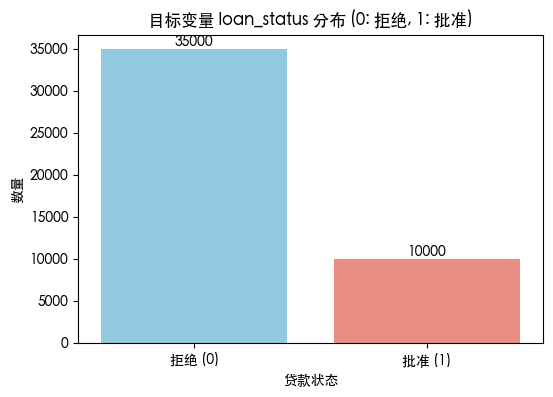


少数类别与多数类别的比例: 0.29
提示：目标变量存在一定程度的类别不平衡。


In [5]:
if not df.empty and 'loan_status' in df.columns:
    print("\n2. 目标变量分析 (`loan_status`)")
    print("===================================")

    # 2.1 目标变量的类别数量和百分比
    print("\n2.1 目标变量的类别数量:")
    status_counts = df['loan_status'].value_counts(dropna=False) # dropna=False 以防目标变量有缺失
    print(status_counts)

    print("\n2.2 目标变量的类别百分比:")
    status_percentage = df['loan_status'].value_counts(normalize=True, dropna=False) * 100
    print(status_percentage)

    # 2.3 可视化目标变量的分布
    plt.figure(figsize=(6, 4))
    sns.countplot(x='loan_status', data=df, palette=['skyblue', 'salmon'])
    plt.title('目标变量 loan_status 分布 (0: 拒绝, 1: 批准)')
    plt.xlabel('贷款状态')
    plt.ylabel('数量')
    # 在条形图上显示具体数值
    for i, count in enumerate(status_counts):
        plt.text(i, count + 50, str(count), ha='center', va='bottom') #  count + 50 是为了让文本在条形图上方一点
    plt.xticks([0, 1], ['拒绝 (0)', '批准 (1)']) # 设置x轴刻度标签
    plt.show()

    # 检查是否存在类别不平衡
    if not status_counts.empty:
        ratio = status_counts.min() / status_counts.max()
        print(f"\n少数类别与多数类别的比例: {ratio:.2f}")
        if ratio < 0.1: # 一个常用的判断严重不平衡的阈值
            print("警告：目标变量存在严重的类别不平衡！")
        elif ratio < 0.3:
            print("提示：目标变量存在一定程度的类别不平衡。")
        else:
            print("目标变量类别分布相对均衡。")
    
    # 检查目标变量是否有缺失值
    if df['loan_status'].isnull().sum() > 0:
        print(f"\n警告：目标变量 'loan_status' 中存在 {df['loan_status'].isnull().sum()} 个缺失值！后续处理需要注意。")

else:
    if df.empty:
        print("数据未能加载，跳过目标变量分析。")
    else:
        print("错误：数据集中未找到目标变量 'loan_status'，跳过目标变量分析。")



3. 单变量分析 (Univariate Analysis)

3.1 数值型特征分析
--------------------

分析特征: person_age


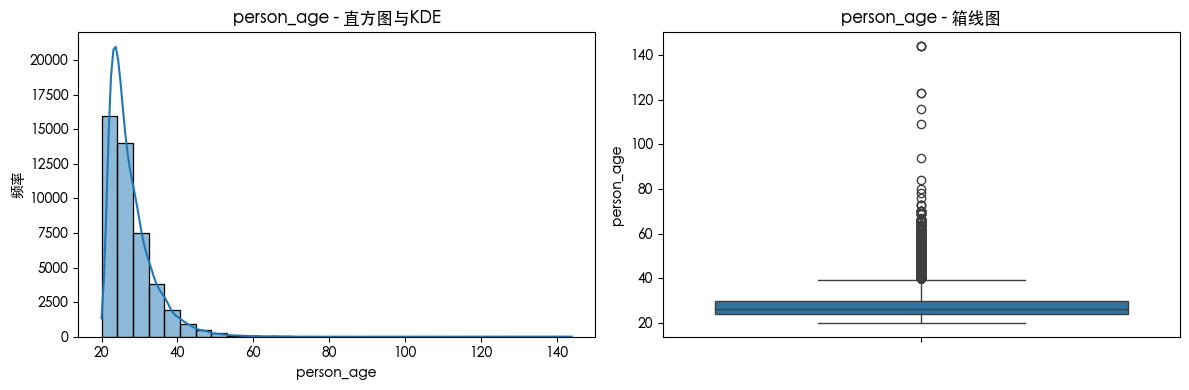

特征 'person_age' 的偏度 (Skewness): 2.55
特征 'person_age' 的峰度 (Kurtosis): 18.65
特征 'person_age' 中基于IQR方法识别的潜在异常值数量: 2188

分析特征: person_income


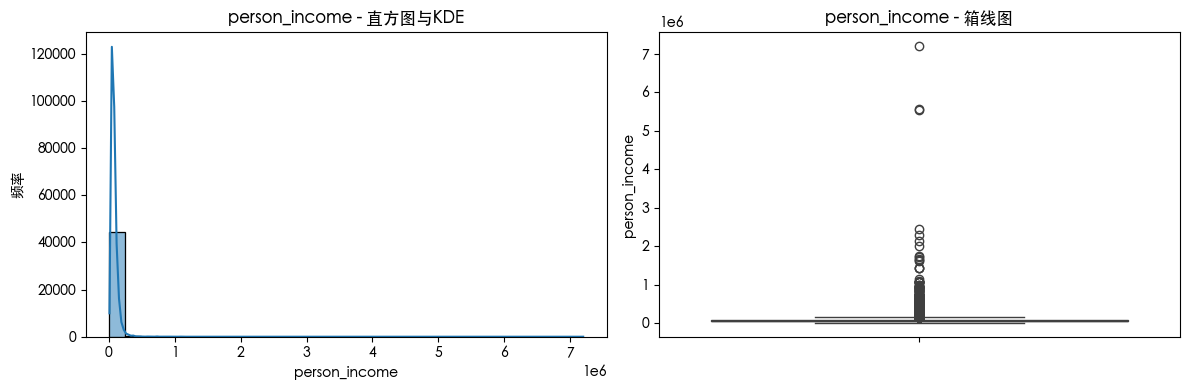

特征 'person_income' 的偏度 (Skewness): 34.14
特征 'person_income' 的峰度 (Kurtosis): 2398.68
特征 'person_income' 中基于IQR方法识别的潜在异常值数量: 2218

分析特征: person_emp_exp


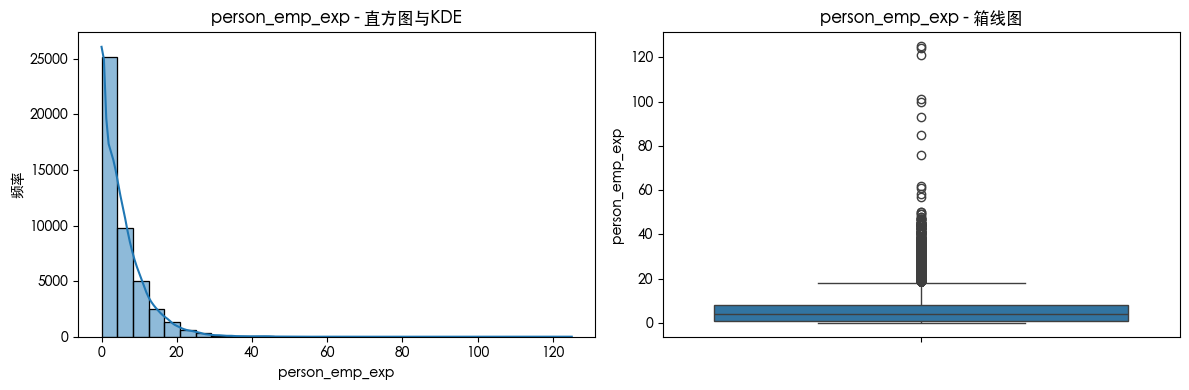

特征 'person_emp_exp' 的偏度 (Skewness): 2.59
特征 'person_emp_exp' 的峰度 (Kurtosis): 19.17
特征 'person_emp_exp' 中基于IQR方法识别的潜在异常值数量: 1724

分析特征: loan_amnt


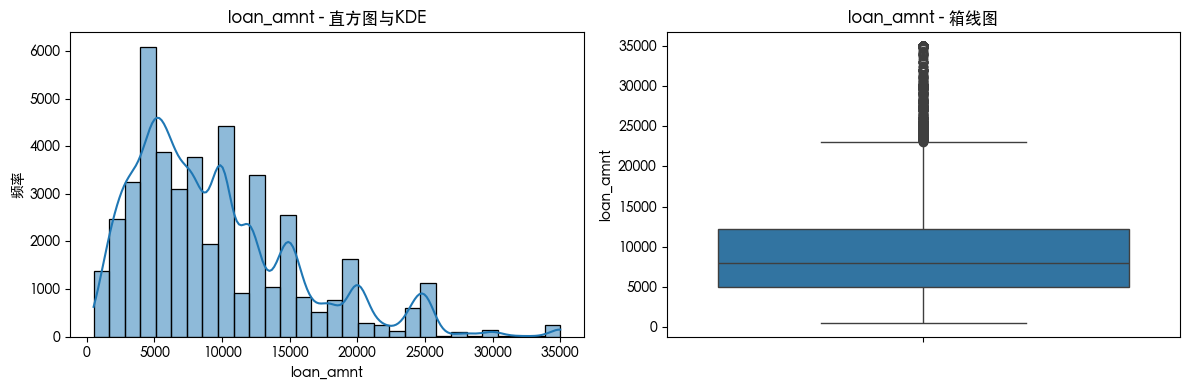

特征 'loan_amnt' 的偏度 (Skewness): 1.18
特征 'loan_amnt' 的峰度 (Kurtosis): 1.35
特征 'loan_amnt' 中基于IQR方法识别的潜在异常值数量: 2348

分析特征: loan_int_rate


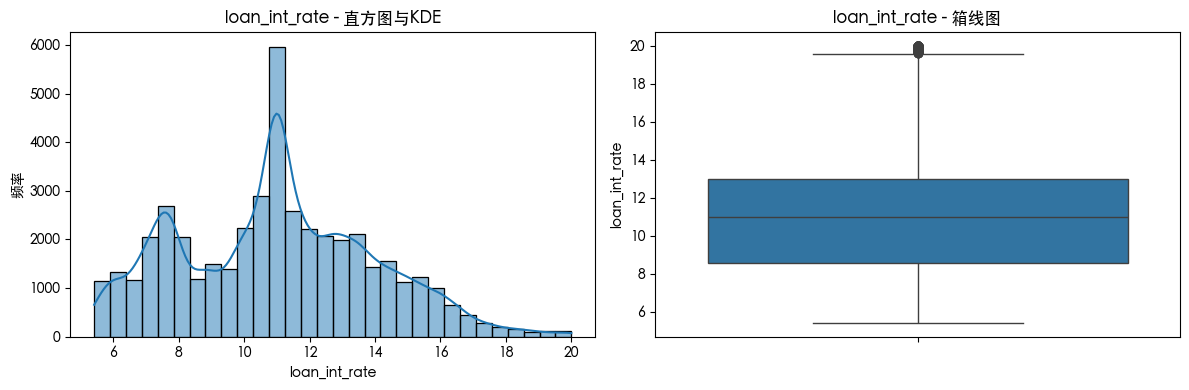

特征 'loan_int_rate' 的偏度 (Skewness): 0.21
特征 'loan_int_rate' 的峰度 (Kurtosis): -0.42
特征 'loan_int_rate' 中基于IQR方法识别的潜在异常值数量: 124

分析特征: cb_person_cred_hist_length


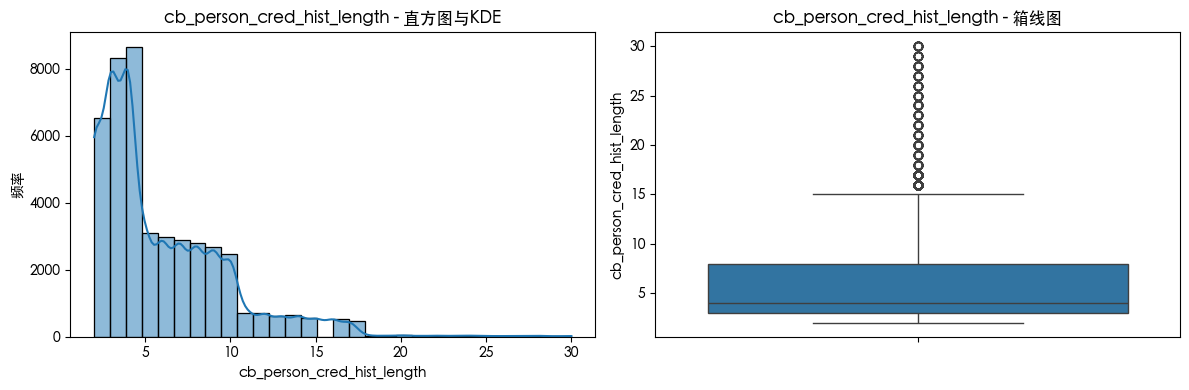

特征 'cb_person_cred_hist_length' 的偏度 (Skewness): 1.63
特征 'cb_person_cred_hist_length' 的峰度 (Kurtosis): 3.73
特征 'cb_person_cred_hist_length' 中基于IQR方法识别的潜在异常值数量: 1366

分析特征: credit_score


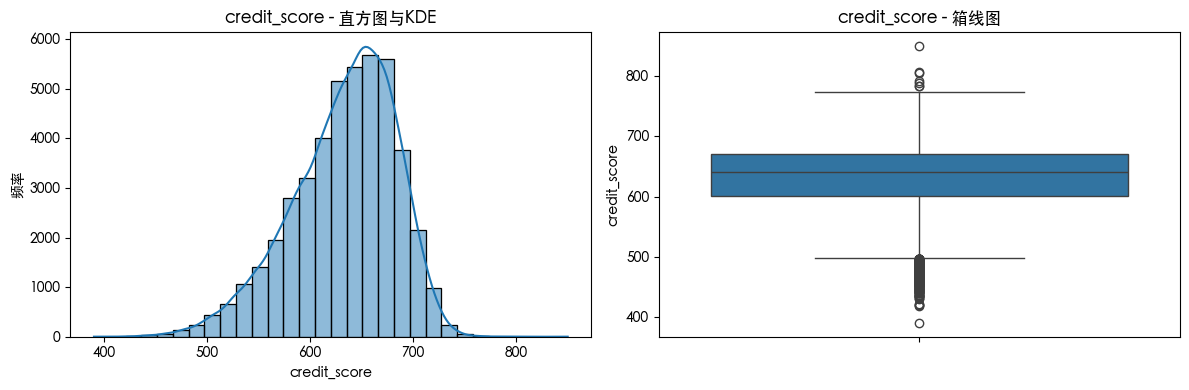

特征 'credit_score' 的偏度 (Skewness): -0.61
特征 'credit_score' 的峰度 (Kurtosis): 0.20
特征 'credit_score' 中基于IQR方法识别的潜在异常值数量: 467


In [6]:
if not df.empty:
    print("\n3. 单变量分析 (Univariate Analysis)")
    print("======================================")
    print("\n3.1 数值型特征分析")
    print("--------------------")

    numerical_cols = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 
                      'loan_int_rate', 'cb_person_cred_hist_length', 'credit_score']
    # 过滤掉数据中不存在的列，以防出错
    existing_numerical_cols = [col for col in numerical_cols if col in df.columns and pd.api.types.is_numeric_dtype(df[col])]

    if not existing_numerical_cols:
        print("在数据中未找到可分析的数值型特征或这些列不是数值类型。")
    else:
        for col in existing_numerical_cols:
            if df[col].isnull().all(): # 如果列中所有值都缺失，则跳过绘图
                print(f"\n特征 '{col}' 所有值均缺失，跳过可视化。")
                continue

            print(f"\n分析特征: {col}")
            
            # 检查是否有足够的多样性来绘图，避免只有一个唯一值（除NaN外）导致绘图错误
            if df[col].nunique(dropna=True) < 2 :
                 print(f"特征 '{col}' 的非缺失唯一值少于2个，可能不适合绘制直方图/箱线图。")
                 print(df[col].value_counts(dropna=False)) # 显示其值计数
                 # 可以选择在这里跳过绘图，或者让它尝试绘制（可能会产生不太有信息的图）
                 # continue

            plt.figure(figsize=(12, 4))

            # 绘制直方图和核密度估计 (KDE)
            plt.subplot(1, 2, 1)
            sns.histplot(df[col], kde=True, bins=30) # kde=True 会添加核密度估计曲线
            plt.title(f'{col} - 直方图与KDE')
            plt.xlabel(col)
            plt.ylabel('频率')

            # 绘制箱线图
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df[col])
            plt.title(f'{col} - 箱线图')
            plt.ylabel(col)

            plt.tight_layout() # 调整子图布局，防止重叠
            plt.show()
            
            # 打印一些统计信息，辅助判断
            print(f"特征 '{col}' 的偏度 (Skewness): {df[col].skew():.2f}")
            print(f"特征 '{col}' 的峰度 (Kurtosis): {df[col].kurt():.2f}")
            # 简单识别潜在异常值（基于IQR，这是一种常见但不绝对的方法）
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
            if not outliers.empty:
                print(f"特征 '{col}' 中基于IQR方法识别的潜在异常值数量: {len(outliers)}")
                # print(f"潜在异常值示例 (最多5个): {outliers.head().tolist()}")
            else:
                print(f"特征 '{col}' 中未基于IQR方法识别到明显异常值。")
else:
    print("数据未能加载，跳过单变量数值特征分析。")


*NOTE*: 
1. 目前cursor对于jupyter notebook插入支持不好，经常翻车，所以选择ask模式更加实际。 此外，数据分析主要是探索和思考，有大量人机合作，所以agent模式的自动执行助力也不大

2. 一般package import和环境变量设置会放在最上层单独一个code cell；但是这里未来让大家看清楚各个包在哪里使用，所以拆开了

**挑战题** 你发现了什么有意思的模式么？

## 3. 数据预处理

任务1: 将分类变量进行One-Hot编码，分类变量包括性别, 教育水平, 购房情况, 贷款意图, 是否曾经违约

任务2: 按照7:3分离训练集和测试集

In [7]:
df = df.query('previous_loan_defaults_on_file=="No"')

In [8]:
# 假设 'df' 是在前面EDA步骤中加载并使用的DataFrame
if 'df' in globals() and not df.empty:
    print("\n数据预处理开始...")
    print("任务1: 分类变量 One-Hot 编码")
    print("===================================")

    # 1. 创建一个副本以避免修改原始EDA用的DataFrame
    df_processed = df.copy()

    # 2. 定义需要进行One-Hot编码的分类变量列名
    categorical_cols_to_encode = [
        'person_gender', 
        'person_education', 
        'person_home_ownership', 
        'loan_intent', 
        'previous_loan_defaults_on_file'
    ]

    # 检查这些列是否实际存在于DataFrame中，避免因列名错误或数据加载不完整导致的问题
    actual_cols_to_encode = [col for col in categorical_cols_to_encode if col in df_processed.columns]
    
    missing_cols = set(categorical_cols_to_encode) - set(actual_cols_to_encode)
    if missing_cols:
        print(f"警告：以下指定的分类列在DataFrame中不存在，将不会被编码: {list(missing_cols)}")

    if not actual_cols_to_encode:
        print("错误：没有在DataFrame中找到可用于One-Hot编码的指定分类列。请检查列名和数据加载过程。")
        # df_processed 保持原样，后续任务可能失败
    else:
        print(f"将对以下列进行One-Hot编码: {actual_cols_to_encode}")
        # 3. 执行One-Hot编码
        # pd.get_dummies 会自动处理NaN值（默认情况下，NaN值的那一行在所有新生成的虚拟列中都会是0）
        # prefix 参数可以帮助我们识别这些新列的来源
        df_processed = pd.get_dummies(df_processed, 
                                     columns=actual_cols_to_encode, 
                                     prefix=actual_cols_to_encode, 
                                     dummy_na=False) # dummy_na=False 是默认行为，不为NaN创建额外列
        
        # 4. 显示处理后的信息
        print("\nOne-Hot编码完成。")
        print("处理后DataFrame的形状 (行数, 列数):")
        print(df_processed.shape)
        print("\n处理后DataFrame的前5行:")
        print(df_processed.head())
else:
    print("错误: DataFrame 'df' 未定义或为空。请确保已成功执行前面的数据加载和EDA步骤。")



数据预处理开始...
任务1: 分类变量 One-Hot 编码
将对以下列进行One-Hot编码: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

One-Hot编码完成。
处理后DataFrame的形状 (行数, 列数):
(22142, 26)

处理后DataFrame的前5行:
   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0          22          71948               0      35000          16.02   
2          25          12438               3       5500          12.87   
3          23          79753               0      35000          15.23   
4          24          66135               1      35000          14.27   
5          21          12951               0       2500           7.14   

   cb_person_cred_hist_length  credit_score  loan_status  \
0                           3           561            1   
2                           3           635            1   
3                           2           675            1   
4                           4           586            1   
5                    

In [9]:
# 任务2: 按照7:3分离训练集和测试集
# 假设 df_processed 是上一步One-Hot编码后的DataFrame
if 'df_processed' in globals() and not df_processed.empty:
    if 'loan_status' not in df_processed.columns:
        print("错误: 目标变量 'loan_status' 不在处理后的DataFrame中。无法进行训练/测试集划分。")
    else:
        print("\n任务2: 训练集和测试集分离")
        print("===================================")
        
        from sklearn.model_selection import train_test_split
        import numpy as np # 用于检查非数值类型

        # 1. 处理目标变量中的缺失值
        initial_rows = len(df_processed)
        df_processed.dropna(subset=['loan_status'], inplace=True) # 删除目标变量缺失的行
        rows_after_dropna = len(df_processed)
        
        if rows_after_dropna < initial_rows:
            print(f"注意：从数据中删除了 {initial_rows - rows_after_dropna} 行，因为目标变量 'loan_status' 存在缺失值。")

        if df_processed.empty:
            print("错误：在移除 'loan_status' 的缺失值后，DataFrame 为空。无法进行训练/测试集划分。")
        else:
            # 2. 定义特征 (X) 和目标 (y)
            y = df_processed['loan_status'].astype(int) # 确保目标变量是整数类型
            X = df_processed.drop('loan_status', axis=1)

            # 检查X中是否还存在非数值类型列（One-Hot编码后理论上不应有未处理的object类型）
            non_numeric_cols_in_X = X.select_dtypes(exclude=np.number).columns
            if not non_numeric_cols_in_X.empty:
                print(f"警告: 特征集 X 中仍包含以下非数值类型的列: {non_numeric_cols_in_X.tolist()}")
                print("这些列可能需要进一步检查和处理。模型训练通常需要所有特征都是数值型。")
                print("X中各列的数据类型:")
                print(X.dtypes)
            
            # 3. 执行训练集和测试集的分离
            # stratify=y 确保类别比例在训练集和测试集中保持一致
            # 添加 y.nunique() > 1 条件以避免在y只有一个类别时 stratify 出错
            stratify_option = y if y.nunique() > 1 else None
            
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, 
                test_size=0.3, 
                random_state=42, 
                stratify=stratify_option
            )

            # 4. 显示结果
            print("\n训练集和测试集分离完成。")
            print("X_train 形状:", X_train.shape)
            print("X_test 形状:", X_test.shape)
            print("y_train 形状:", y_train.shape)
            print("y_test 形状:", y_test.shape)

            if stratify_option is not None:
                print("\ny_train 中目标变量的分布 (百分比):")
                print(y_train.value_counts(normalize=True) * 100)
                print("\ny_test 中目标变量的分布 (百分比):")
                print(y_test.value_counts(normalize=True) * 100)
            else:
                print("\n目标变量只有一个类别，未进行分层抽样。")
                print("\ny_train 中目标变量的分布:")
                print(y_train.value_counts())
                print("\ny_test 中目标变量的分布:")
                print(y_test.value_counts())

            # 你现在可以将这些数据集用于模型训练：
            # X_train, X_test, y_train, y_test
            # (这些变量将存在于您的Notebook的全局作用域中)

elif 'df_processed' not in globals() or df_processed.empty:
    print("错误: DataFrame 'df_processed' 未定义或为空。请先成功执行One-Hot编码任务。")



任务2: 训练集和测试集分离
警告: 特征集 X 中仍包含以下非数值类型的列: ['person_gender_female', 'person_gender_male', 'person_education_Associate', 'person_education_Bachelor', 'person_education_Doctorate', 'person_education_High School', 'person_education_Master', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER', 'person_home_ownership_OWN', 'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE', 'previous_loan_defaults_on_file_No']
这些列可能需要进一步检查和处理。模型训练通常需要所有特征都是数值型。
X中各列的数据类型:
person_age                             int64
person_income                          int64
person_emp_exp                         int64
loan_amnt                              int64
loan_int_rate                        float64
cb_person_cred_hist_length             int64
credit_score                           int64
person_gender_female                    bool
person_gender_male                    

## 4. 模型训练

### 4.1 基础训练
#### 4.1.1 代码


在训练集上训练一个决策树模型，给出F1-score和AUC两个评价指标，并画出ROC曲线




决策树模型训练完成。

--- 训练集评估 ---
F1-score (训练集): 1.0000
AUC (训练集): 1.0000


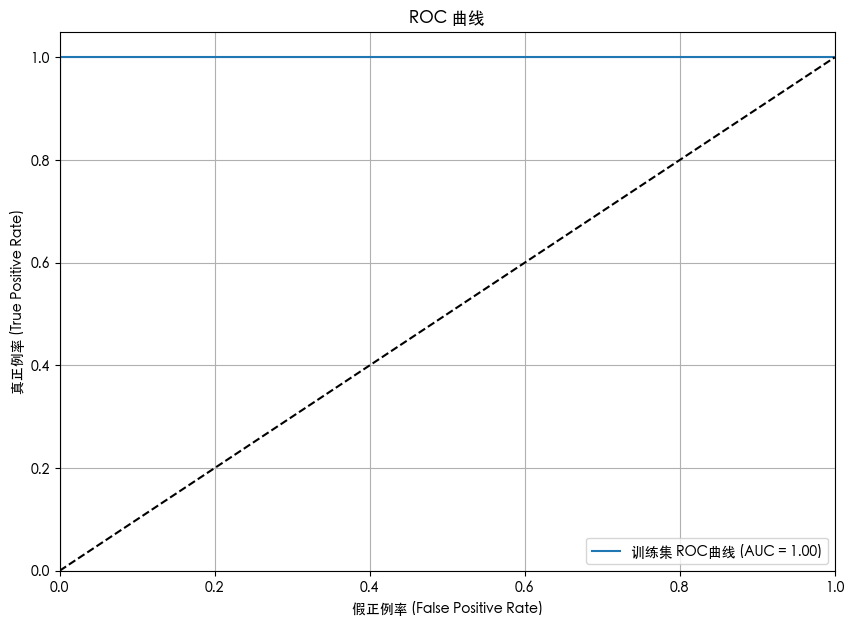

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd # 确保pandas已导入



# 确保X_train, X_test中的所有列都是数值类型
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# 3. 初始化并训练决策树模型
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
print("\n决策树模型训练完成。")

# 4. 在训练集上进行预测和评估
y_train_pred = dt_classifier.predict(X_train)
y_train_pred_proba = dt_classifier.predict_proba(X_train)[:, 1]

f1_train = f1_score(y_train, y_train_pred)
auc_train = roc_auc_score(y_train, y_train_pred_proba)
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)

print("\n--- 训练集评估 ---")
print(f"F1-score (训练集): {f1_train:.4f}")
print(f"AUC (训练集): {auc_train:.4f}")
# 6. 绘制ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'训练集 ROC曲线 (AUC = {auc_train:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (False Positive Rate)')
plt.ylabel('真正例率 (True Positive Rate)')
plt.title('ROC 曲线')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


测试集上给出F1-score和AUC两个评价指标，并画出ROC曲线


--- 测试集评估 ---
F1-score (测试集): 0.7712
AUC (测试集): 0.7910


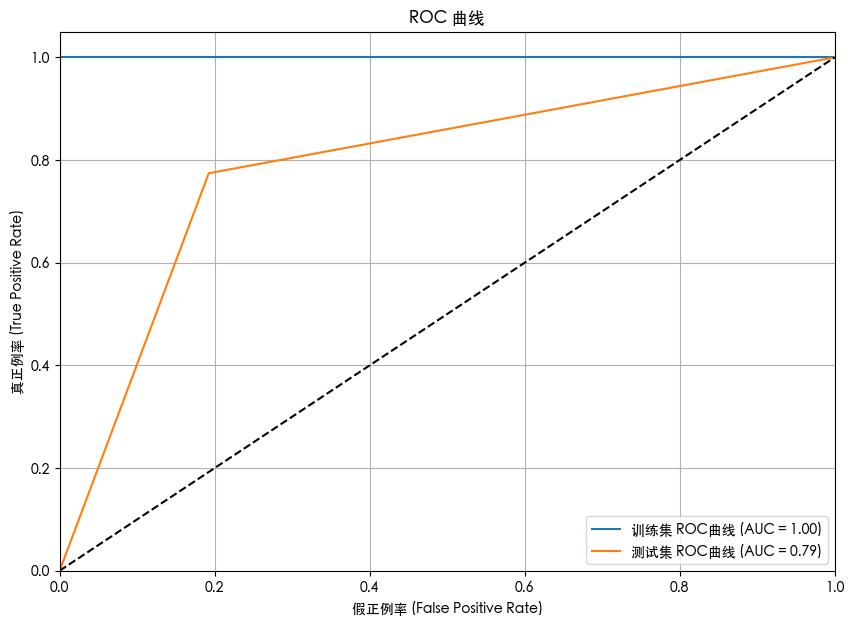

In [11]:

# 5. 在测试集上进行预测和评估
y_test_pred = dt_classifier.predict(X_test)
y_test_pred_proba = dt_classifier.predict_proba(X_test)[:, 1]

f1_test = f1_score(y_test, y_test_pred)
auc_test = roc_auc_score(y_test, y_test_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

print("\n--- 测试集评估 ---")
print(f"F1-score (测试集): {f1_test:.4f}")
print(f"AUC (测试集): {auc_test:.4f}")

# 6. 绘制ROC曲线
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'训练集 ROC曲线 (AUC = {auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'测试集 ROC曲线 (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正例率 (False Positive Rate)')
plt.ylabel('真正例率 (True Positive Rate)')
plt.title('ROC 曲线')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


探究overfit的原因

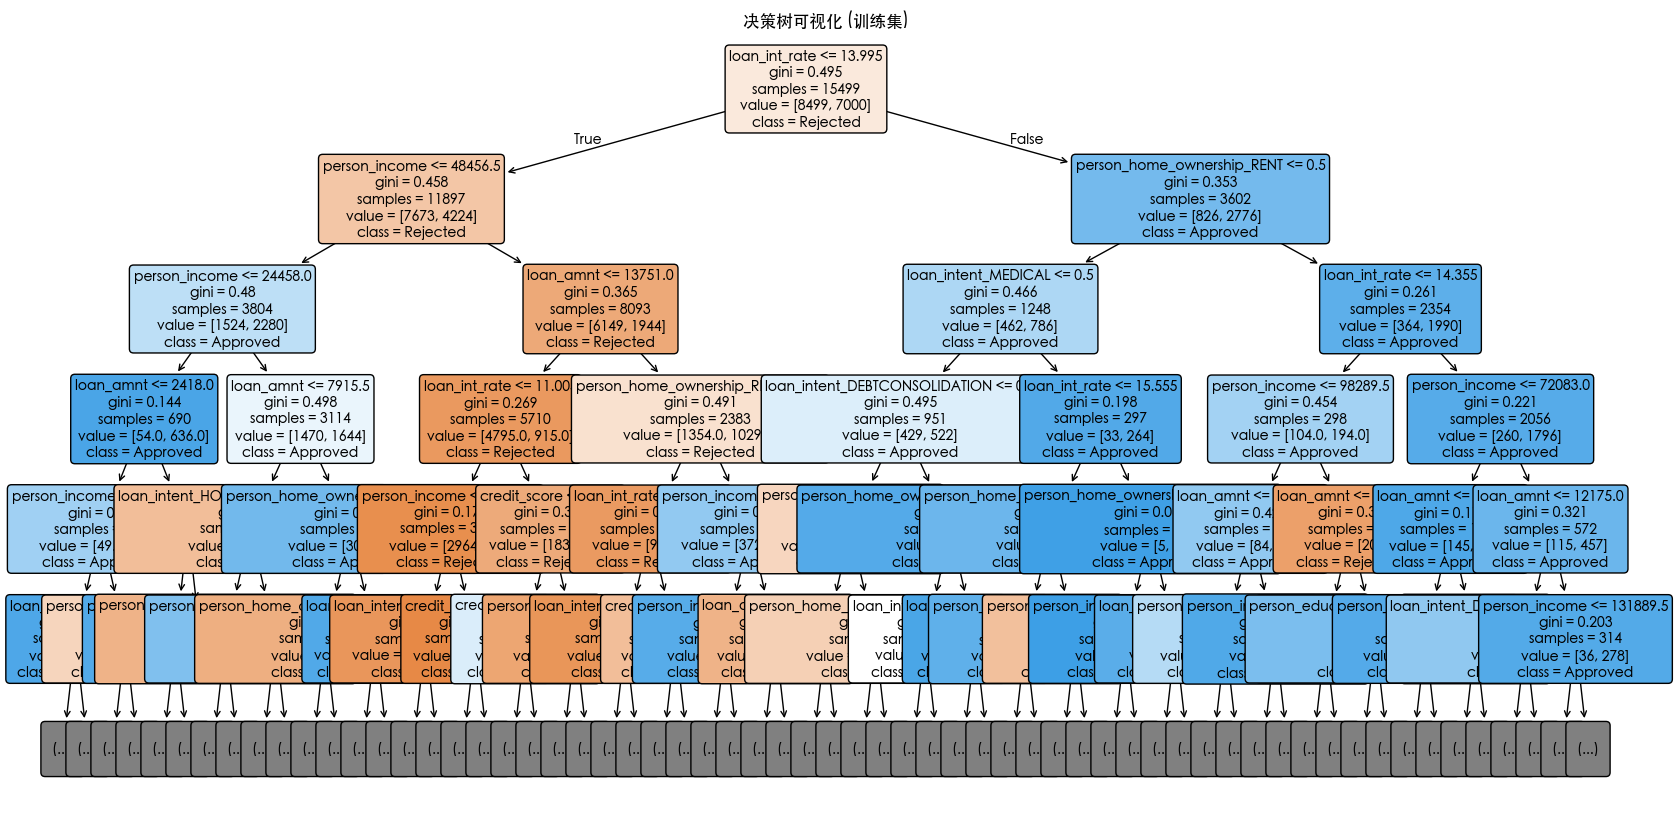

In [12]:
from sklearn.tree import  plot_tree
    # 6. Visualize the Decision Tree
plt.figure(figsize=(20,10)) #可以调整图像大小以获得更好的可读性
plot_tree(dt_classifier, 
            feature_names=X_train.columns.tolist(), # 特征名称
            class_names=['Rejected', 'Approved'], # 类别名称，请根据您的目标变量实际含义调整
            filled=True, 
            rounded=True, 
            fontsize=10,
            max_depth=5) # 可以设置最大深度以简化可视化，如果树很大
plt.title("决策树可视化 (训练集)")
plt.show()

#### 4.1.2 讨论

根据这个数据，你会做什么决策？


### 4.2 Cross Validation & Parameter Tuning ###
#### 4.2.1 训练过程 ####

开始网格搜索以优化决策树超参数...
Fitting 5 folds for each of 160 candidates, totalling 800 fits

网格搜索完成。
找到的最佳超参数组合:
{'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 60, 'min_samples_split': 2}
交叉验证中的最佳 ROC AUC 分数: 0.8948

--- 使用最佳估计器在训练集上评估 ---
F1-score (训练集): 0.8169
AUC (训练集): 0.9224

--- 使用最佳估计器在测试集上评估 ---
F1-score (测试集): 0.7956
AUC (测试集): 0.8985


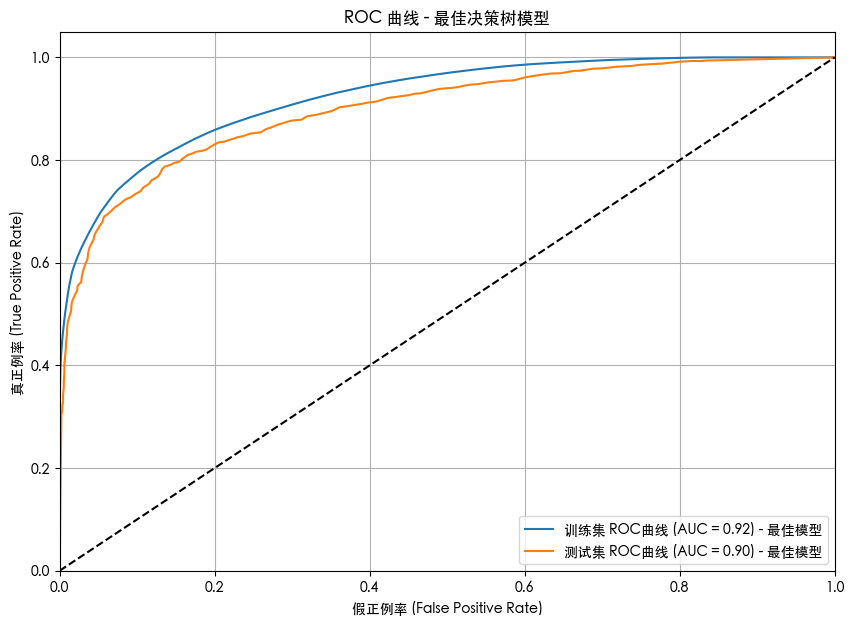

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np # 确保numpy已导入

# 假设 X_train, X_test, y_train, y_test 已在之前的步骤中定义并准备好
# 并且 df_processed 也是存在的，尽管这里主要使用X_train, y_train

if 'X_train' in globals() and 'y_train' in globals() and \
   'X_test' in globals() and 'y_test' in globals():
    
    print("\n### 4.2 Cross Validation & Parameter Tuning ###")
    print("#### 4.2.1 训练过程 ####")

    # 1. 定义参数网格
    param_grid = {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15, 20], # None表示不限制深度，可以添加更多值
        'min_samples_split': [2, 5, 10, 20], # 内部节点再划分所需最小样本数
        'min_samples_leaf': [20, 40, 60, 120]    # 叶节点最少样本数
    }

    # 确保X_train中的所有列都是数值类型
    # One-Hot编码后，布尔类型通常会被sklearn自动处理为0/1，但显式转换更安全
    X_train = X_train.astype(float)
    X_test = X_test.astype(float)


    # 2. 初始化GridSearchCV
    # n_jobs=-1 可以使用所有可用的CPU核心，加快搜索速度
    grid_search = GridSearchCV(
        estimator=DecisionTreeClassifier(random_state=42),
        param_grid=param_grid,
        cv=5,  # 5折交叉验证
        scoring='roc_auc', # 评分方法
        n_jobs=-1,
        verbose=1 # verbose=1 会输出一些日志信息，可以设置为0以减少输出
    )

    print("\n开始网格搜索以优化决策树超参数...")
    # 3. 在训练数据上拟合GridSearchCV
    grid_search.fit(X_train, y_train)

    # 4. 输出最佳参数和最佳roc_auc分数
    print("\n网格搜索完成。")
    print("找到的最佳超参数组合:")
    print(grid_search.best_params_)
    print(f"交叉验证中的最佳 ROC AUC 分数: {grid_search.best_score_:.4f}")

    # 获取最佳估计器
    best_dt_classifier = grid_search.best_estimator_

    # 5. 在训练集和测试集上评估最佳模型
    y_train_pred_best = best_dt_classifier.predict(X_train)
    y_train_pred_proba_best = best_dt_classifier.predict_proba(X_train)[:, 1]
    
    y_test_pred_best = best_dt_classifier.predict(X_test)
    y_test_pred_proba_best = best_dt_classifier.predict_proba(X_test)[:, 1]

    f1_train_best = f1_score(y_train, y_train_pred_best)
    auc_train_best = roc_auc_score(y_train, y_train_pred_proba_best)
    fpr_train_best, tpr_train_best, _ = roc_curve(y_train, y_train_pred_proba_best)

    f1_test_best = f1_score(y_test, y_test_pred_best)
    auc_test_best = roc_auc_score(y_test, y_test_pred_proba_best)
    fpr_test_best, tpr_test_best, _ = roc_curve(y_test, y_test_pred_proba_best)
    
    print("\n--- 使用最佳估计器在训练集上评估 ---")
    print(f"F1-score (训练集): {f1_train_best:.4f}")
    print(f"AUC (训练集): {auc_train_best:.4f}")
    
    print("\n--- 使用最佳估计器在测试集上评估 ---")
    print(f"F1-score (测试集): {f1_test_best:.4f}")
    print(f"AUC (测试集): {auc_test_best:.4f}")

    # 6. 绘制ROC曲线
    plt.figure(figsize=(10, 7))
    plt.plot(fpr_train_best, tpr_train_best, label=f'训练集 ROC曲线 (AUC = {auc_train_best:.2f}) - 最佳模型')
    plt.plot(fpr_test_best, tpr_test_best, label=f'测试集 ROC曲线 (AUC = {auc_test_best:.2f}) - 最佳模型')
    plt.plot([0, 1], [0, 1], 'k--') # 对角虚线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假正例率 (False Positive Rate)')
    plt.ylabel('真正例率 (True Positive Rate)')
    plt.title('ROC 曲线 - 最佳决策树模型')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

else:
    print("错误: 训练/测试数据集 (X_train, y_train, X_test, y_test) 未定义或为空。")
    print("请确保在执行此代码块之前已成功完成数据预处理和划分步骤。")


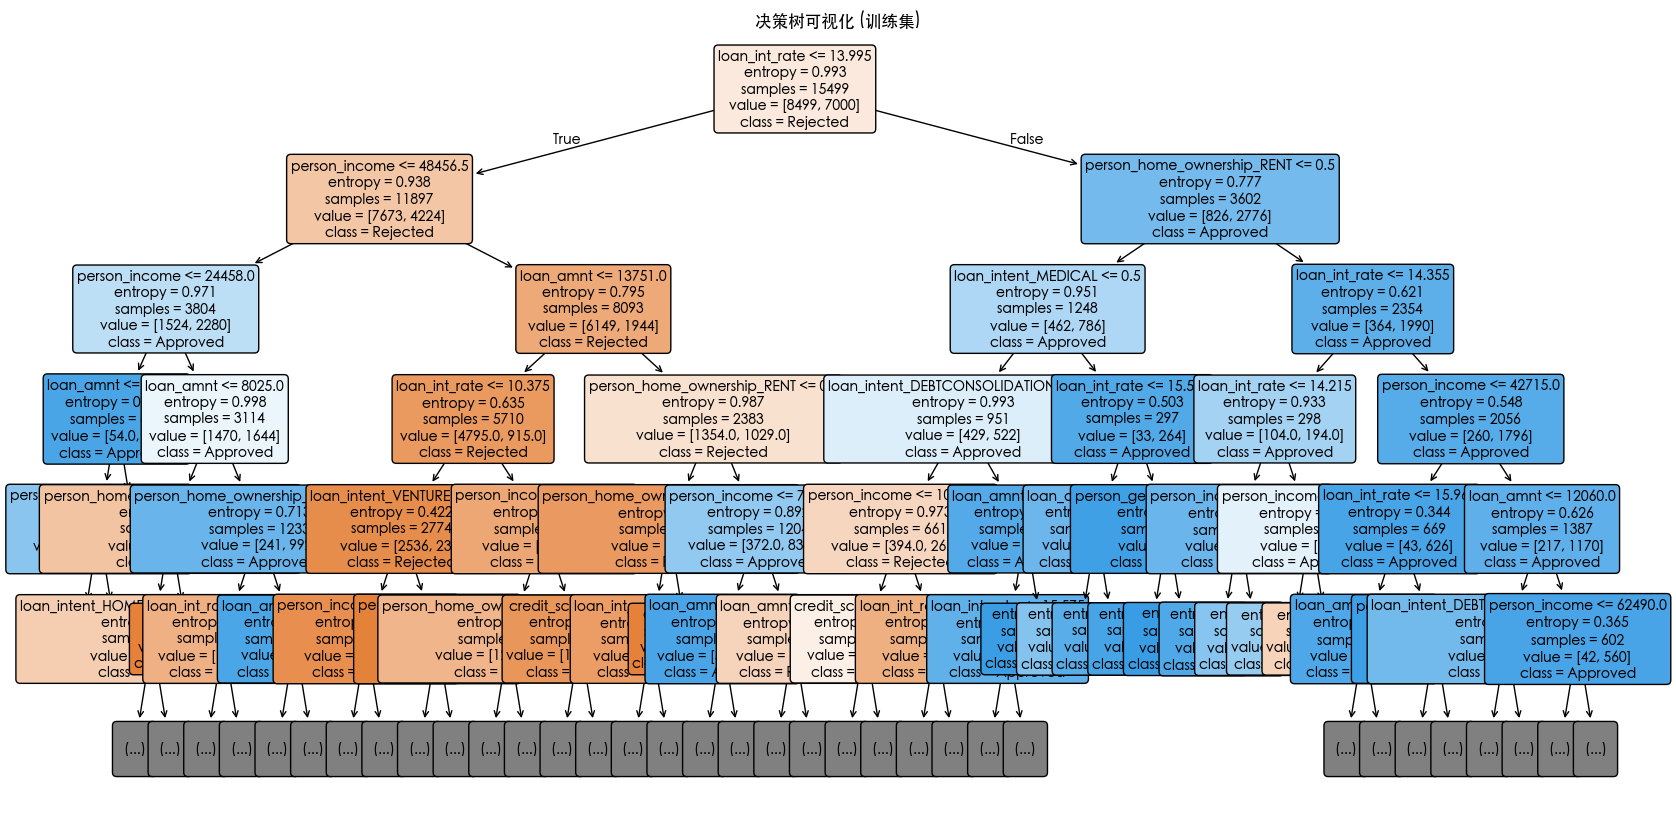

In [15]:
    # 6. Visualize the Decision Tree
plt.figure(figsize=(20,10)) #可以调整图像大小以获得更好的可读性
plot_tree(best_dt_classifier, 
            feature_names=X_train.columns.tolist(), # 特征名称
            class_names=['Rejected', 'Approved'], # 类别名称，请根据您的目标变量实际含义调整
            filled=True, 
            rounded=True, 
            fontsize=10,
            max_depth=5) # 可以设置最大深度以简化可视化，如果树很大
plt.title("决策树可视化 (训练集)")
plt.show()


### 4.3 SVM Cross Validation & Parameter Tuning ###
#### 4.3.1 SVM 训练过程 ####

开始网格搜索以优化SVM超参数...
Fitting 3 folds for each of 8 candidates, totalling 24 fits

SVM网格搜索完成。
找到的最佳超参数组合 (SVM):
{'svc__C': 10, 'svc__gamma': 'auto', 'svc__kernel': 'rbf'}
交叉验证中的最佳 ROC AUC 分数 (SVM): 0.8727

--- 使用最佳估计器在训练集上评估 (SVM) ---
F1-score (训练集, SVM): 0.8330
AUC (训练集, SVM): 0.9197

--- 使用最佳估计器在测试集上评估 (SVM) ---
F1-score (测试集, SVM): 0.7860
AUC (测试集, SVM): 0.8848


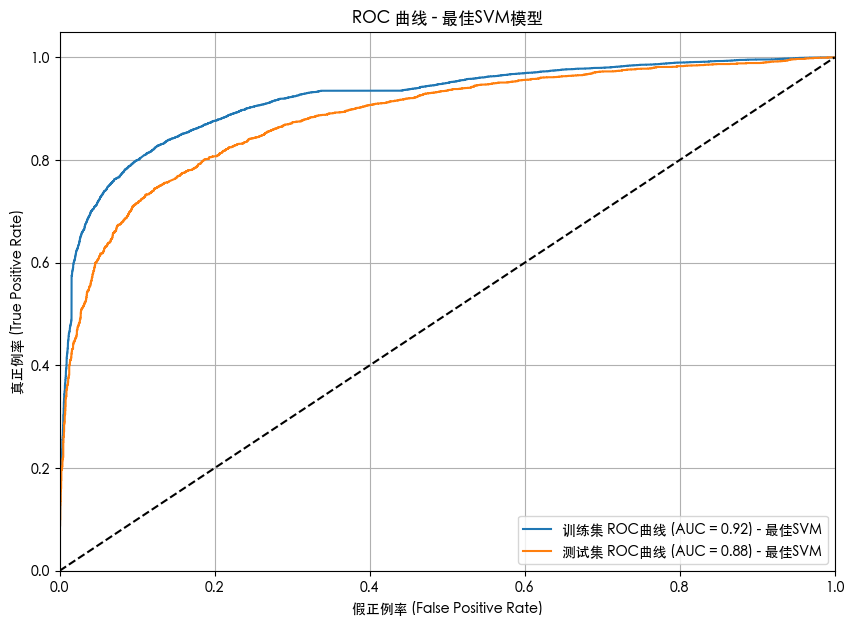

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 假设 X_train, X_test, y_train, y_test 已在之前的步骤中定义并准备好

if 'X_train' in globals() and 'y_train' in globals() and \
   'X_test' in globals() and 'y_test' in globals():
    
    print("\n### 4.3 SVM Cross Validation & Parameter Tuning ###")
    print("#### 4.3.1 SVM 训练过程 ####")

    # 1. 创建一个Pipeline，包含StandardScaler和SVC
    # SVC中设置probability=True以获取概率估计，用于ROC AUC计算
    # random_state用于结果可复现性
    pipeline_svm = Pipeline([
        ('scaler', StandardScaler()),
        ('svc', SVC(probability=True, random_state=42))
    ])

    # 2. 定义SVM的参数网格
    # 由于gamma参数仅对'rbf', 'poly', 'sigmoid'核有效，我们为不同核定义不同的参数组合
    param_grid_svm = [
        {
            'svc__kernel': ['linear'], 
            'svc__C': [1, 10]
        },
        {
            'svc__kernel': ['rbf'], 
            'svc__C': [1, 10, 100], 
            'svc__gamma': ['scale', 'auto']
        }
    ]
    # 注意：为了节约计算时间，参数范围取得较小，实际应用中可以尝试更广的范围

    # 确保X_train, X_test中的所有列都是数值类型 (此步骤已在决策树部分完成)
    # X_train = X_train.astype(float)
    # X_test = X_test.astype(float)

    # 3. 初始化GridSearchCV
    grid_search_svm = GridSearchCV(
        estimator=pipeline_svm,
        param_grid=param_grid_svm,
        cv=3,  # 3折交叉验证以加快速度，实际可使用5折
        scoring='roc_auc',
        n_jobs=2,
        verbose=1
    )

    print("\n开始网格搜索以优化SVM超参数...")
    # 4. 在训练数据上拟合GridSearchCV
    grid_search_svm.fit(X_train, y_train)

    # 5. 输出最佳参数和最佳roc_auc分数
    print("\nSVM网格搜索完成。")
    print("找到的最佳超参数组合 (SVM):")
    print(grid_search_svm.best_params_)
    print(f"交叉验证中的最佳 ROC AUC 分数 (SVM): {grid_search_svm.best_score_:.4f}")

    # 获取最佳估计器 (整个Pipeline)
    best_svm_pipeline = grid_search_svm.best_estimator_

    # 6. 在训练集和测试集上评估最佳SVM模型
    y_train_pred_svm_best = best_svm_pipeline.predict(X_train)
    y_train_pred_proba_svm_best = best_svm_pipeline.predict_proba(X_train)[:, 1]
    
    y_test_pred_svm_best = best_svm_pipeline.predict(X_test)
    y_test_pred_proba_svm_best = best_svm_pipeline.predict_proba(X_test)[:, 1]

    f1_train_svm_best = f1_score(y_train, y_train_pred_svm_best)
    auc_train_svm_best = roc_auc_score(y_train, y_train_pred_proba_svm_best)
    fpr_train_svm_best, tpr_train_svm_best, _ = roc_curve(y_train, y_train_pred_proba_svm_best)

    f1_test_svm_best = f1_score(y_test, y_test_pred_svm_best)
    auc_test_svm_best = roc_auc_score(y_test, y_test_pred_proba_svm_best)
    fpr_test_svm_best, tpr_test_svm_best, _ = roc_curve(y_test, y_test_pred_proba_svm_best)
    
    print("\n--- 使用最佳估计器在训练集上评估 (SVM) ---")
    print(f"F1-score (训练集, SVM): {f1_train_svm_best:.4f}")
    print(f"AUC (训练集, SVM): {auc_train_svm_best:.4f}")
    
    print("\n--- 使用最佳估计器在测试集上评估 (SVM) ---")
    print(f"F1-score (测试集, SVM): {f1_test_svm_best:.4f}")
    print(f"AUC (测试集, SVM): {auc_test_svm_best:.4f}")

    # 7. 绘制ROC曲线
    plt.figure(figsize=(10, 7))
    plt.plot(fpr_train_svm_best, tpr_train_svm_best, label=f'训练集 ROC曲线 (AUC = {auc_train_svm_best:.2f}) - 最佳SVM')
    plt.plot(fpr_test_svm_best, tpr_test_svm_best, label=f'测试集 ROC曲线 (AUC = {auc_test_svm_best:.2f}) - 最佳SVM')
    plt.plot([0, 1], [0, 1], 'k--') # 对角虚线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假正例率 (False Positive Rate)')
    plt.ylabel('真正例率 (True Positive Rate)')
    plt.title('ROC 曲线 - 最佳SVM模型')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

else:
    print("错误: 训练/测试数据集 (X_train, y_train, X_test, y_test) 未定义或为空。")
    print("请确保在执行此代码块之前已成功完成数据预处理和划分步骤。")


### 4.2 Cross Validation & Parameter Tuning

#### 4.2.1 训练过程

使用5 fold cross validation来做decision tree classifer的优化。

请对于criterion，max_depth，min_samples_split和min_samples_leaf这四个parameter的grid search，评分方法是roc_auc。

#### 4.2.2 讨论

根据这个数据，你会做什么决策？

## 5. 总结

1. 学习了机器学习的基本过程：EDA -> 数据预处理 -> Parameter Choice
2. 学习了如何使用F1-score & AUC来评估模型表现，并进行训练决策
3. 学习了如何利用Gemini来进行辅助和代码执行

机器学习是一个技术（technique）和手感（craftmanship）相结合的过程。成熟的工具包和LLM极大降低了technique达到合格水平的难度，因此模型表现更多来自手感。

下一个lab，我们会讨论如何code 手感，kind of